In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench import load_results



In [3]:
results = load_results('Week22_Open_exploration_PD_0.tar.gz')
experiments, outcomes = results

In [8]:
y_deaths= outcomes['Expected Number of Deaths']
y_costs =  outcomes['All Costs']

In [5]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,8,278.405578,1.5,0.872290,291.885061,1.5,0.716958,167.882540,10.0,0.019372,...,8,8,7,8,5,7,4,10,0,dikesnet
1,46,94.820196,1.5,0.502275,338.342179,10.0,0.398165,81.867211,1.5,0.966974,...,8,8,7,8,5,7,4,11,0,dikesnet
2,111,118.913197,10.0,0.965798,198.212633,1.5,0.475785,332.309805,1.0,0.165428,...,8,8,7,8,5,7,4,12,0,dikesnet
3,110,184.019252,1.0,0.989091,131.450547,1.0,0.652897,327.583099,10.0,0.401067,...,8,8,7,8,5,7,4,13,0,dikesnet
4,91,76.344170,1.5,0.564976,271.809710,10.0,0.552502,37.660494,1.5,0.981007,...,8,8,7,8,5,7,4,14,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,193.846326,1.5,0.575513,126.602257,1.5,0.438043,160.916844,10.0,0.920118,...,4,10,4,5,1,6,2,105,9,dikesnet
996,107,298.393492,1.0,0.695393,159.253526,1.0,0.129247,178.697219,1.0,0.079012,...,4,10,4,5,1,6,2,106,9,dikesnet
997,3,227.343156,10.0,0.048210,64.302192,10.0,0.042440,201.048069,10.0,0.032441,...,4,10,4,5,1,6,2,107,9,dikesnet
998,107,257.851430,10.0,0.274046,181.779586,1.5,0.601984,109.824018,10.0,0.225310,...,4,10,4,5,1,6,2,108,9,dikesnet


In [6]:
import statsmodels.api as sm

X = pd.DataFrame(experiments).drop(['model','policy'], inplace=False, axis=1)
X_0 = sm.add_constant(X)

est_deaths = sm.OLS(y_deaths, X_0.astype(float)).fit()
print(est_deaths.summary())
#print(est_deaths.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     15.38
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.68e-61
Time:                        14:15:00   Log-Likelihood:                 2567.0
No. Observations:                1000   AIC:                            -5074.
Df Residuals:                     970   BIC:                            -4927.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [9]:
est_costs = sm.OLS(y_costs, X_0.astype(float)).fit()
print(est_costs.summary())
#print(est_deaths.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     226.7
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        14:15:47   Log-Likelihood:                -20279.
No. Observations:                1000   AIC:                         4.062e+04
Df Residuals:                     970   BIC:                         4.077e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

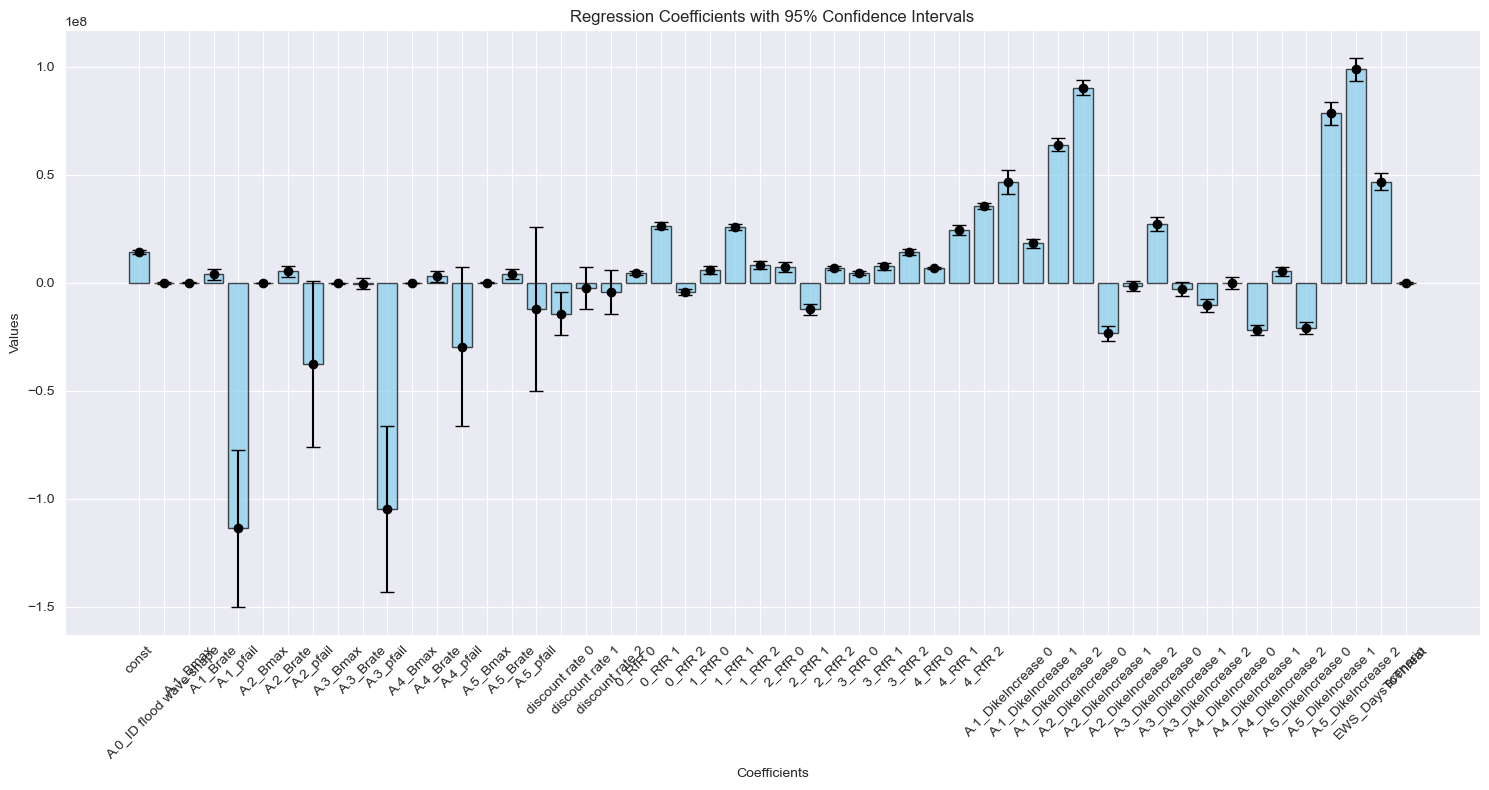

In [15]:
# Coëfficiënten en betrouwbaarheidsintervallen ophalen
coef_costs = est_costs.params
conf_int_costs = est_costs.conf_int()

# Plotten
fig, ax = plt.subplots(figsize=(15, 8))

# Histogram van coëfficiënten
ax.bar(range(len(coef_costs)), coef_costs, color='skyblue', alpha=0.7, align='center', edgecolor='black')

# Lijntjes voor betrouwbaarheidsintervallen
ax.errorbar(range(len(coef_costs)), coef_costs, 
            yerr=[coef_costs - conf_int_costs[0], conf_int_costs[1] - coef_costs], 
            fmt='o', color='black', capsize=5)

# Labels en titel
ax.set_xticks(range(len(coef_costs)))
ax.set_xticklabels(coef_costs.index, rotation=45)
ax.set_xlabel('Coefficients')
ax.set_ylabel('Values')
ax.set_title('Regression Coefficients with 95% Confidence Intervals')

plt.tight_layout()

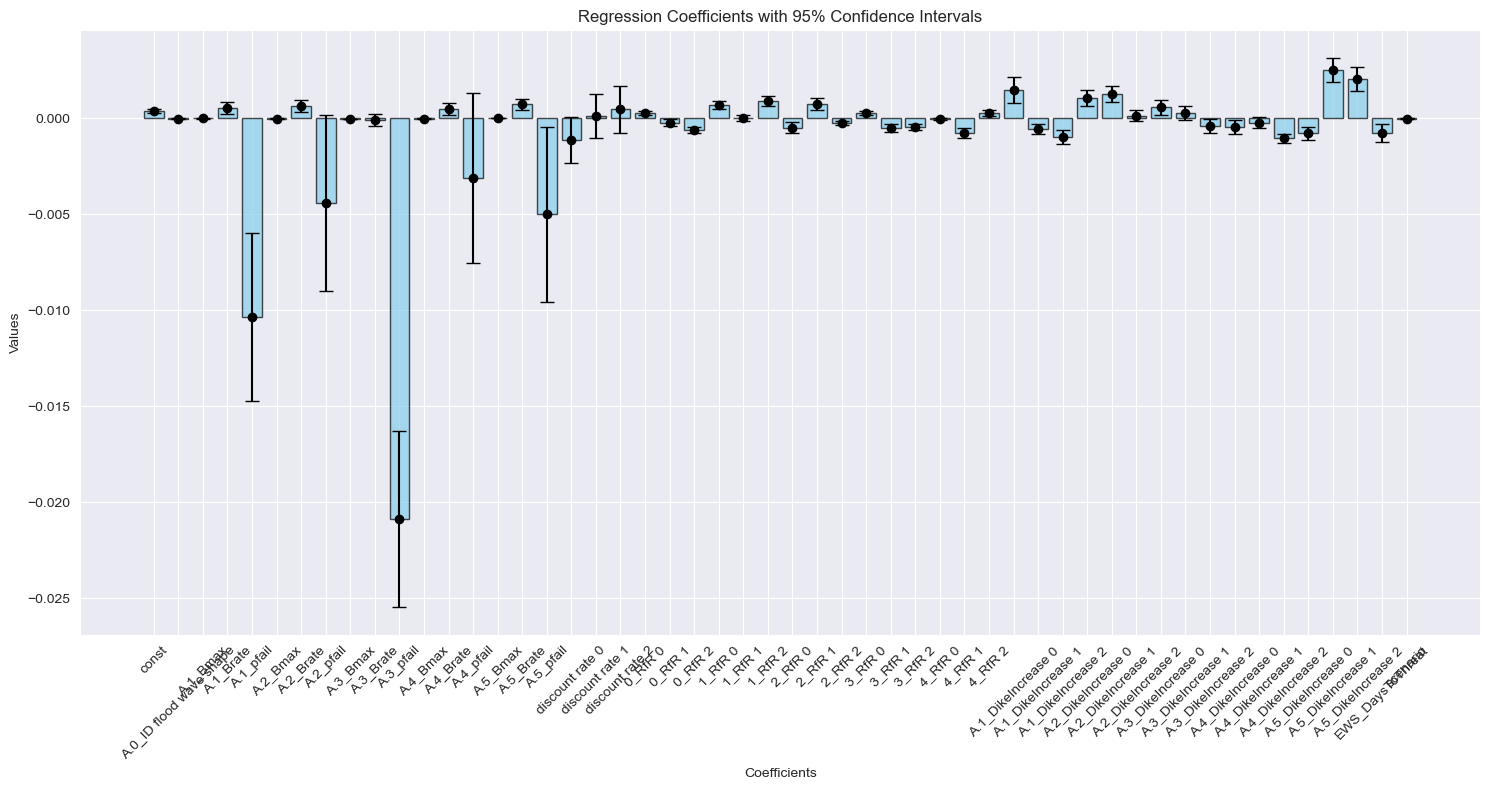

In [16]:
#Coëfficiënten en betrouwbaarheidsintervallen ophalen
coef_deaths = est_deaths.params
conf_int_deaths = est_deaths.conf_int()

# Plotten
fig, ax = plt.subplots(figsize=(15, 8))  # Verhoog de figsize voor een grotere plot

# Histogram van coëfficiënten
ax.bar(range(len(coef_deaths)), coef_deaths, color='skyblue', alpha=0.7, align='center', edgecolor='black')

# Lijntjes voor betrouwbaarheidsintervallen
ax.errorbar(range(len(coef_deaths)), coef_deaths, 
            yerr=[coef_deaths - conf_int_deaths[0], conf_int_deaths[1] - coef_deaths], 
            fmt='o', color='black', capsize=5)

# Labels en titel
ax.set_xticks(range(len(coef_deaths)))
ax.set_xticklabels(coef_deaths.index, rotation=45)
ax.set_xlabel('Coefficients')
ax.set_ylabel('Values')
ax.set_title('Regression Coefficients with 95% Confidence Intervals')

plt.tight_layout()
plt.show()